# Checking Results

In [12]:
import pandas as pd
import pygmo as pg
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [2]:
configs = pd.read_csv('./new_results_single_obj_dataset_3_11_2')

In [3]:
configs.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,3.890674e+12,6.880808e+10,-0.000313,0.341741,4.790454e+07,6.765362e+06,-0.020351,0.346099,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
1,6.412787e+01,4.600507e+01,0.393230,21.150108,5.071936e+01,4.162709e+01,0.420759,21.546997,"{""num_rec"": 1, ""max_time"": 37, ""neuron_0"": 13,..."
2,9.104768e+00,6.402071e+00,0.894290,5.716380,8.152480e+00,5.686495e+00,0.864017,6.193633,"{""num_rec"": 1, ""max_time"": 33, ""neuron_0"": 41,..."
3,1.165506e+01,9.404483e+00,0.832079,3.404232,1.077005e+01,8.785693e+00,0.745412,3.141193,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 80,..."
4,6.368504e+01,4.456621e+01,0.303820,28.210373,4.602140e+01,3.699266e+01,0.464500,28.688482,"{""num_rec"": 1, ""max_time"": 29, ""neuron_0"": 38,..."


In [4]:
configs.shape

(252, 9)

In [5]:
scaler = MinMaxScaler()
norm_cfgs = scaler.fit_transform(configs[['rmse_test', 'uncertainty_test']])

In [6]:
hyper_volume =[]
for i in range(norm_cfgs.shape[0]):
    hv = pg.hypervolume(norm_cfgs[:i+1])
    hyper_volume.append(hv.compute(ref_point=[1.1,1.1]))

hyper_volume = np.array(hyper_volume)

In [7]:
configs_bi = pd.read_csv('./GRU/Final_experiments/dataset_3/results_no_cv_HO_26_12_MO').iloc[:300]

In [8]:
configs_bi.head()

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,2.037194e+01,1.776858e+01,0.493754,10.511260,2.064205e+01,1.819137e+01,0.316019,11.039882,"{""num_rec"": 1, ""max_time"": 35, ""neuron_0"": 62,..."
1,7.578074e+01,5.648686e+01,-2.551426,103.418945,5.120919e+01,4.088745e+01,-1.308507,17.355362,"{""num_rec"": 1, ""max_time"": 31, ""neuron_0"": 24,..."
2,1.611320e+02,1.277127e+02,-42.817646,0.753569,1.314109e+02,1.089698e+02,-118.790413,0.767642,"{""num_rec"": 1, ""max_time"": 23, ""neuron_0"": 22,..."
3,5.651538e+05,1.787017e+04,-0.000990,0.341459,3.520836e+04,6.305594e+03,-0.032284,0.345109,"{""num_rec"": 2, ""max_time"": 49, ""neuron_0"": 41,..."
4,2.924472e+12,2.785623e+10,-0.000091,0.397280,4.833739e+08,6.460028e+07,-0.018186,0.399527,"{""num_rec"": 1, ""max_time"": 21, ""neuron_0"": 52,..."


In [9]:
configs_bi.shape

(300, 9)

In [10]:
scaler_bi = MinMaxScaler()
norm_cfgs_bi = scaler_bi.fit_transform(configs_bi[['rmse_test', 'uncertainty_test']])

In [11]:
hyper_volume_bi =[]
for i in range(norm_cfgs_bi.shape[0]):
    hv_bi = pg.hypervolume(norm_cfgs_bi[:i+1])
    hyper_volume_bi.append(hv_bi.compute(ref_point=[1.1,1.1]))

hyper_volume_bi = np.array(hyper_volume_bi)

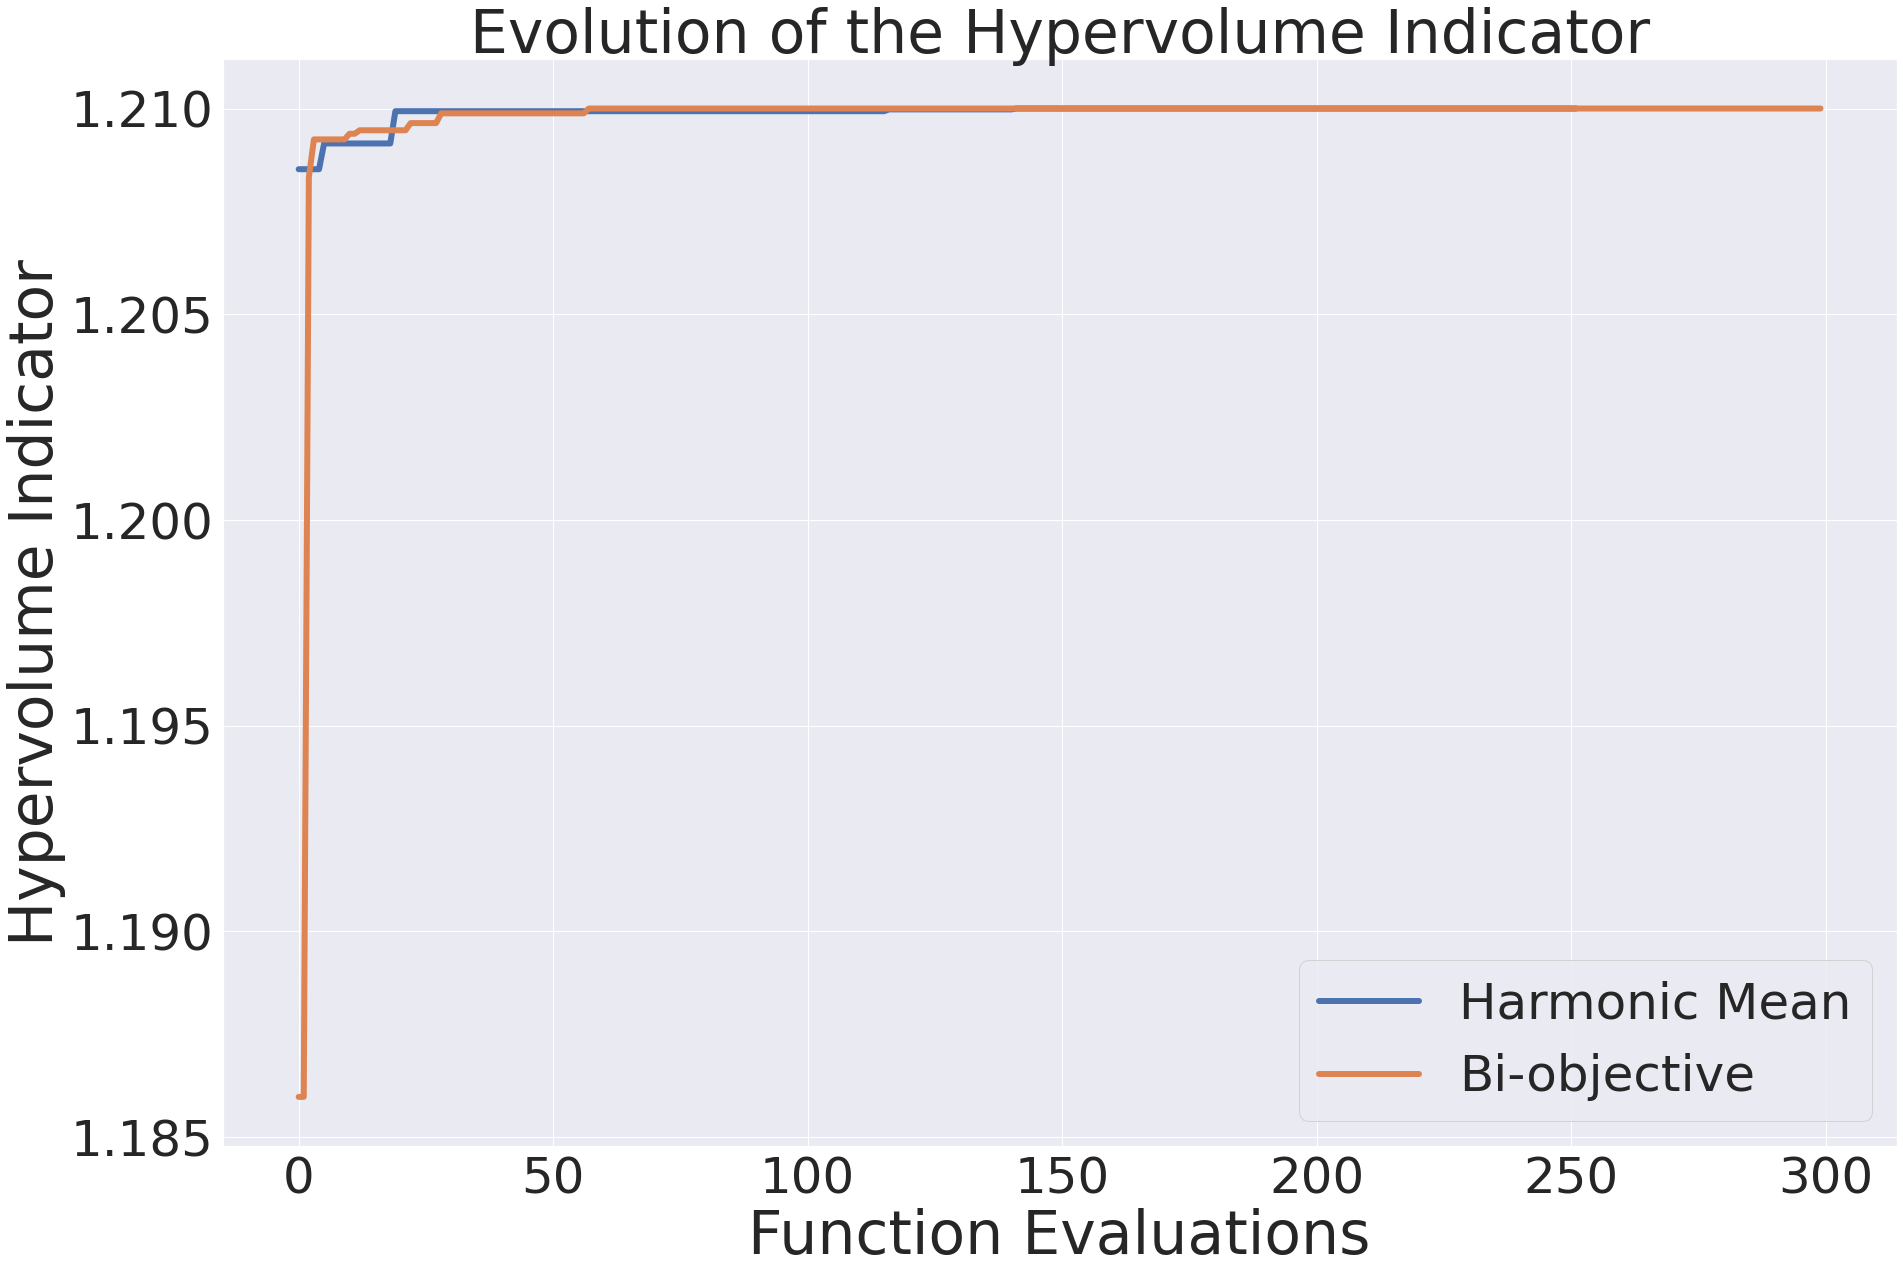

In [14]:
plt.figure(figsize=(30,20))
plt.plot(np.arange(hyper_volume.shape[0]), hyper_volume, label='Harmonic Mean', linewidth=6) 
plt.plot(np.arange(hyper_volume_bi.shape[0]), hyper_volume_bi, label='Bi-objective', linewidth=6)
plt.xlabel('Function Evaluations', fontsize=60)
plt.ylabel('Hypervolume Indicator', fontsize=60)
plt.title('Evolution of the Hypervolume Indicator', fontsize=60)
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.legend(prop={'size': 50}) 

# plt.savefig('./paper_figures/cmapss_3_HM_vs_BI_HVI.pdf', format='pdf')
 



In [32]:
hyper_volume

array([1.20852463, 1.20852463, 1.20852463, 1.20852463, 1.20852463,
       1.20915065, 1.20915065, 1.20915065, 1.20915065, 1.20915065,
       1.20915065, 1.20915065, 1.20915065, 1.20915065, 1.20915065,
       1.20915065, 1.20915065, 1.20915065, 1.20915065, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993471,
       1.20993471, 1.20993471, 1.20993471, 1.20993471, 1.20993

In [33]:
hyper_volume_bi

array([1.18597626, 1.18597626, 1.20832975, 1.20924922, 1.20924922,
       1.20924922, 1.20924922, 1.20924922, 1.20924922, 1.20924922,
       1.20938661, 1.20938661, 1.20947128, 1.20947128, 1.20947128,
       1.20947128, 1.20947128, 1.20947128, 1.20947128, 1.20947128,
       1.20947128, 1.20947128, 1.20964541, 1.20964541, 1.20964541,
       1.20964541, 1.20964541, 1.20964541, 1.20988276, 1.20988276,
       1.20988276, 1.20988276, 1.20988276, 1.20988276, 1.20988276,
       1.20988276, 1.20988276, 1.20988276, 1.20988276, 1.20988276,
       1.20988276, 1.20988276, 1.20988276, 1.20988276, 1.20988276,
       1.20988276, 1.20988276, 1.20988276, 1.20988276, 1.20988276,
       1.20988276, 1.20988276, 1.20988276, 1.20988276, 1.20988276,
       1.20988276, 1.20988276, 1.21      , 1.21      , 1.21      ,
       1.21      , 1.21      , 1.21      , 1.21      , 1.21      ,
       1.21      , 1.21      , 1.21      , 1.21      , 1.21      ,
       1.21      , 1.21      , 1.21      , 1.21      , 1.21   

In [17]:
hyper_volume[-1]

1.2100000000000004

In [19]:
hyper_volume_bi[-1]

1.2100000000000002

# Training full model on the best HP

In [10]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="-1"  # uncomment in case running ONLY on CPU is required

import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import backend as k
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import History
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

from activations import Activate
from losses import CustomLoss
from preprocessing import build_data

import numpy as np
import pandas as pd
import math
from datetime import datetime

from sklearn import pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import json

In [11]:
net_cfg = {"num_rec": 2, "max_time": 45, "neuron_0": 76, "neuron_1": 94, "neuron_2": 73, "activation_rec_0": "tanh", "activation_rec_1": "sigmoid",
 "activation_rec_2": "tanh", "rec_dropout_norm_0": 0.04950945000000001, "rec_dropout_norm_1": 0.3735058500000001, "rec_dropout_norm_2": 0.76050155,
  "recurrent_dropout_0": 0.32850635, "recurrent_dropout_1": 0.51750425, "recurrent_dropout_2": 0.4635048500000001, "final_activation_0": "exp",
   "final_activation_1": "softplus", "percentage": 68, "rul": 128, "rul_style": "nonlinear", "lr": "1e-3", "batch": "128", "num_den": 1, "neuron_den_0": 44,
    "neuron_den_1": 50, "neuron_den_2": 55, "activation_den_0": "sigmoid", "activation_den_1": "tanh", "activation_den_2": "tanh", "dropout_0": 0.4995044500000001,
     "dropout_1": 0.83250075, "dropout_2": 0.59850335}

In [12]:
cfg = {'cv': 10, 'shuffle': True,
'random_state': 21,
'mask_value': -99,
'reps': 30,
'epochs': 20,
'batches': 64}

In [13]:
def weibull_mean(alpha, beta):
    return alpha * math.gamma(1 + 1/beta)

In [14]:
def network(train_X, train_y, net_cfg, cfg):
    k.set_epsilon(1e-10)
    strategy = tf.distribute.MirroredStrategy()

    history = History()
    nan_terminator = callbacks.TerminateOnNaN()
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss')
    early_stopping = callbacks.EarlyStopping(monitor='loss', patience=5)
    # checkpoint_filepath = './saved_models/cp-{epoch:04d}.ckpt'
    # checkpoint = callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='loss', verbose=1)
    # logdir="logs/test1" #+ datetime.now().strftime("%Y%m%d-%H%M%S")
    # tensorboard = callbacks.TensorBoard(log_dir=logdir)

    window = train_X.shape[1]
    n_features = train_X.shape[2]

    with strategy.scope():  # Create a MirroredStrategy.

        inputs = keras.Input(shape=(window, n_features))
        masking_layer = keras.layers.Masking(mask_value=cfg['mask_value'])(inputs)

        # recurrent layers
        last = 0
        if net_cfg["num_rec"] > 1:
            for i in np.arange(net_cfg["num_rec"] - 1):
                masking_layer = keras.layers.GRU(
                    net_cfg["neuron_" + str(i)],
                    activation=net_cfg["activation_rec_" + str(i)],
                    dropout=net_cfg["rec_dropout_norm_" + str(i)],
                    recurrent_dropout=net_cfg["recurrent_dropout_" + str(i)],
                    return_sequences=True,
                )(masking_layer)
            last = i + 1
            
        gru_last = keras.layers.GRU(
        net_cfg["neuron_" + str(last)],
        activation=net_cfg["activation_rec_" + str(last)],
        dropout=net_cfg["rec_dropout_norm_" + str(last)],
        recurrent_dropout=net_cfg["recurrent_dropout_" + str(last)],
        return_sequences=False,
        )(masking_layer)

        # dense layers
        last = 0
        if net_cfg["num_den"] > 1:
            for i in np.arange(net_cfg["num_den"] - 1):
                gru_last = keras.layers.Dense(
                net_cfg["neuron_den_" + str(i)],
                activation=net_cfg["activation_den_" + str(i)],
                )(gru_last)
                gru_last = keras.layers.Dropout(
                    rate=net_cfg["dropout_" + str(i)],
                )(gru_last)
            last = i + 1
     
        dense_ = keras.layers.Dense(2)(gru_last)
        custom_activation = Activate(net_cfg=net_cfg)
        outputs = keras.layers.Activation(custom_activation)(dense_)

        model = keras.Model(inputs=inputs, outputs=outputs, name="weibull_params")

        # rmse = tf.keras.metrics.RootMeanSquaredError()
        model.compile(loss=CustomLoss(kind='continuous', reduce_loss=True), optimizer=Adam(lr=eval(net_cfg['lr']),
                                                                                        clipvalue=0.5))
    model.summary()  # uncomment for debugging

    batch_size=eval(net_cfg['batch'])
    model.fit(train_X, train_y,
              epochs=cfg['epochs'],
              batch_size=eval(net_cfg['batch']),
              verbose=1,
              callbacks=[nan_terminator, history, reduce_lr, early_stopping],  #, checkpoint, tensorboard], 
              workers=32)

    return model, history



In [16]:
def load_data():

    np.random.seed(42)

    id_col = 'unit_number'
    time_col = 'time'
    feature_cols = ['op_setting_1', 'op_setting_2', 'op_setting_3'] + ['sensor_measurement_{}'.format(x) for x in
                                                                       range(1, 22)]
    column_names = [id_col, time_col] + feature_cols

    train_x_orig = pd.read_csv('./DataSets/CMAPSS/train_FD003.csv', header=None, sep='\s+', decimal=".")
    train_x_orig.columns = column_names

    test_x_orig = pd.read_csv('./DataSets/CMAPSS/test_FD003.csv', header=None, sep='\s+', decimal=".")
    test_x_orig.columns = column_names

    test_y_orig = pd.read_csv('./DataSets/CMAPSS/RUL_FD003.csv', header=None, names=['T'])

    # Make engine numbers and days zero-indexed
    train_x_orig.iloc[:, 0:2] -= 1
    test_x_orig.iloc[:, 0:2] -= 1

    # Pre-processing data
    scaler = pipeline.Pipeline(steps=[
        ('minmax', MinMaxScaler(feature_range=(-1, 1))),
        ('remove_constant', VarianceThreshold())])

    train = train_x_orig.copy()
    train = np.concatenate([train[['unit_number', 'time']], scaler.fit_transform(train[feature_cols])], axis=1)

    train_x, train_y = build_data(units=train[:, 0], time=train[:, 1], x=train[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=False, mask_value=cfg['mask_value'],
                                    original_data=None, net_cfg = net_cfg, label=net_cfg['rul_style'])

    test_or = test_x_orig.copy()
    test_or = np.concatenate([test_or[['unit_number', 'time']], scaler.transform(test_or[feature_cols])], axis=1)


    # Preparing data for the RNN (numpy arrays)
    test_or, _ = build_data(units=test_or[:, 0], time=test_or[:, 1], x=test_or[:, 2:], max_time=net_cfg['max_time'],
                                    is_test=True, mask_value=-99,
                                    original_data=np.repeat(200, test_or.shape[0]), net_cfg = net_cfg, label=net_cfg['rul_style'])

    

    return train_x, train_y, test_or, test_y_orig, train_x_orig


In [19]:
train_x, train_y, test_x, test_y, train_x_orig = load_data()

100%|██████████| 100/100 [00:00<00:00, 12184.95it/s]


In [20]:
print('train_x', train_x.shape, 'train_y', train_y.shape, 'test_x', test_x.shape, 'test_y', test_y.shape)


train_x (24720, 45, 18) train_y (24720, 1) test_x (100, 45, 18) test_y (100, 1)


In [22]:
model = tf.keras.models.load_model('./Final_experiments/dataset_3/SO/saved_models_16_1/cp-0034.ckpt/', custom_objects={"CustomLoss": CustomLoss, "Activate": Activate})

In [23]:
model.summary()

Model: "weibull_params"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 45, 18)]          0         
_________________________________________________________________
masking (Masking)            (None, 45, 18)            0         
_________________________________________________________________
gru (GRU)                    (None, 45, 76)            21888     
_________________________________________________________________
gru_1 (GRU)                  (None, 94)                48504     
_________________________________________________________________
dense (Dense)                (None, 2)                 190       
_________________________________________________________________
activation (Activation)      (None, 2)                 0         
Total params: 70,582
Trainable params: 70,582
Non-trainable params: 0
________________________________________________

In [24]:
reps = 30
test_predict_1 = []
test_predict_2 = []
for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    test_predict = model(test_x, training=True).numpy()
    test_predict_1.append(
        test_predict[:, 0].reshape(test_predict[:, 0].shape[0], 1)
    )
    test_predict_2.append(
        test_predict[:, 1].reshape(test_predict[:, 1].shape[0], 1)
    )

test_predict_1_median = np.median(np.hstack(test_predict_1), axis=1)
test_predict_2_median = np.median(np.hstack(test_predict_2), axis=1)
test_predict_1_median = test_predict_1_median.reshape(
    test_predict_1_median.shape[0], 1
)
test_predict_2_median = test_predict_2_median.reshape(
    test_predict_2_median.shape[0], 1
)
test_predict_1_std = np.std(np.hstack(test_predict_1), axis=1)
test_predict_2_std = np.std(np.hstack(test_predict_2), axis=1)
test_predict_1_std = test_predict_1_std.reshape(test_predict_1_std.shape[0], 1)
test_predict_2_std = test_predict_2_std.reshape(test_predict_2_std.shape[0], 1)

test_predict = np.hstack(
    [
        test_predict_1_median,
        test_predict_2_median,
        test_predict_1_std,
        test_predict_2_std,
    ]
)

test_predict = np.resize(
    test_predict, (test_x.shape[0], 4)
)  # changed from 2 to 4
test_result = np.concatenate((test_y, test_predict), axis=1)
test_results_df = pd.DataFrame(
    test_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)

test_results_df["predicted_mu"] = test_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
test_results_df["uncertainty"] = np.mean(test_predict[:, 2:], axis=1)

In [25]:
train_predict_1 = []
train_predict_2 = []

success = True

for i in range(cfg["reps"]):
    tf.random.set_seed(i)
    train_predict = model(train_x, training=True).numpy()
    train_predict_1.append(
        train_predict[:, 0].reshape(train_predict[:, 0].shape[0], 1)
    )
    train_predict_2.append(
        train_predict[:, 1].reshape(train_predict[:, 1].shape[0], 1)
    )

train_predict_1_median = np.median(np.hstack(train_predict_1), axis=1)
train_predict_2_median = np.median(np.hstack(train_predict_2), axis=1)
train_predict_1_median = train_predict_1_median.reshape(
    train_predict_1_median.shape[0], 1
)
train_predict_2_median = train_predict_2_median.reshape(
    train_predict_2_median.shape[0], 1
)
train_predict_1_std = np.std(np.hstack(train_predict_1), axis=1)
train_predict_2_std = np.std(np.hstack(train_predict_2), axis=1)
train_predict_1_std = train_predict_1_std.reshape(
    train_predict_1_std.shape[0], 1
)
train_predict_2_std = train_predict_2_std.reshape(
    train_predict_2_std.shape[0], 1
)

train_predict = np.hstack(
    [
        train_predict_1_median,
        train_predict_2_median,
        train_predict_1_std,
        train_predict_2_std,
    ]
)

train_predict = np.resize(train_predict, (train_x.shape[0], 4))
train_result = np.concatenate((train_y, train_predict), axis=1)
train_results_df = pd.DataFrame(
    train_result,
    columns=["T", "median_alpha", "median_beta", "std_alpha", "std_beta"],
)
train_results_df["unit_number"] = train_x_orig["unit_number"].to_numpy()
train_results_df["time"] = train_x_orig["time"].to_numpy()

train_results_df["predicted_mu"] = train_results_df[
    ["median_alpha", "median_beta"]
].apply(lambda row: weibull_mean(row[0], row[1]), axis=1)
train_results_df["uncertainty"] = np.mean(train_predict[:, 2:], axis=1)

In [26]:
columns = [
        "rmse_train",
        "mae_train",
        "r2_train",
        "uncertainty_train",
        "rmse_test",
        "mae_test",
        "r2_test",
        "uncertainty_test",
        "net_cfg",
    ]
results = pd.DataFrame(columns=columns)

rmse_train = []
r2_train = []
mae_train = []
std_train = []

rmse_test = []
r2_test = []
mae_test = []
std_test = []

In [27]:
# Performance evaluation
# train:
rmse_train.append(
    np.sqrt(
        mean_squared_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
mae_train.append(
    (
        mean_absolute_error(
            train_results_df["predicted_mu"], train_results_df["T"]
        )
    )
)
r2_train.append(
    r2_score(train_results_df["predicted_mu"], train_results_df["T"])
)
std_train.append(train_results_df["uncertainty"].mean())

# test:
rmse_test.append(
    np.sqrt(
        mean_squared_error(
            test_results_df["predicted_mu"], test_results_df["T"]
        )
    )
)
mae_test.append(
    (mean_absolute_error(test_results_df["predicted_mu"], test_results_df["T"]))
)
r2_test.append(r2_score(test_results_df["predicted_mu"], test_results_df["T"]))
std_test.append(test_results_df["uncertainty"].mean())

# registering results
results["rmse_train"] = rmse_train
results["mae_train"] = mae_train
results["r2_train"] = r2_train
results["uncertainty_train"] = std_train
results["rmse_test"] = rmse_test
results["mae_test"] = mae_test
results["r2_test"] = r2_test
results["uncertainty_test"] = std_test
results["net_cfg"] = json.dumps(net_cfg)

In [38]:
# Results=pd.concat([results187,results263, results101,results290,results267,results165])
# Results.to_csv('Final_experiments/dataset_1/Results', index=False)

In [28]:
Results = pd.read_csv('./Final_experiments/dataset_3/Results')

In [29]:
Results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,7.575404,4.336924,9.239237e-01,9.207510,29.552284,24.566884,8.435993e-02,10.955388,"{""num_rec"": 2, ""max_time"": 43, ""neuron_0"": 99,..."
1,9.186297,5.339990,8.978573e-01,5.832856,33.674919,27.582440,-1.261073e-01,8.039048,"{""num_rec"": 2, ""max_time"": 41, ""neuron_0"": 66,..."
2,11.224087,7.647560,8.294404e-01,6.333294,30.380470,25.293960,4.640427e-02,7.102947,"{""num_rec"": 1, ""max_time"": 42, ""neuron_0"": 39,..."
3,17.002123,8.833919,5.634647e-01,4.584947,28.584963,23.038121,1.701253e-01,4.842565,"{""num_rec"": 1, ""max_time"": 38, ""neuron_0"": 18,..."
4,15.346226,12.622725,7.459343e-01,5.022429,28.049817,22.720292,2.690534e-01,6.516240,"{""num_rec"": 2, ""max_time"": 28, ""neuron_0"": 47,..."
5,48.582587,43.046125,-5.173757e+00,0.112687,49.159559,39.988679,-7.879014e+00,0.124297,"{""num_rec"": 2, ""max_time"": 36, ""neuron_0"": 31,..."
6,49.879267,38.173469,-2.611979e-01,0.057543,39.821387,31.566101,-9.135834e-01,0.066144,"{""num_rec"": 1, ""max_time"": 34, ""neuron_0"": 20,..."
7,93.771359,71.642471,-1.291496e+01,7.087929,68.007954,57.031587,-3.769305e+00,10.293589,"{""num_rec"": 2, ""max_time"": 27, ""neuron_0"": 71,..."
8,108.860192,80.573080,-1.102285e+16,0.000009,45.198604,38.100121,-1.117981e+15,0.000009,"{""num_rec"": 2, ""max_time"": 26, ""neuron_0"": 71,..."


In [30]:
results

,rmse_train,mae_train,r2_train,uncertainty_train,rmse_test,mae_test,r2_test,uncertainty_test,net_cfg
0,6.133287,4.062871,0.968232,6.876695,33.90297,27.154622,0.201363,7.877335,"{""num_rec"": 2, ""max_time"": 45, ""neuron_0"": 76,..."
